# Exercício - Treinar o que foi aprendido

Aparencia: sol, nubaldo, chuva <br>
Temperatura: -130 ~ 130F <br>
Umidade: 0 ~ 100 <br>
Jogar: sim/não <br>
<br><br>
Tratar Valores NAS

In [28]:
import pandas as pd
import seaborn as srn
import statistics as sts
import matplotlib.pyplot as plt

# Exploração dos dados como um todo

In [31]:
dataset = pd.read_csv('tempo.csv', sep=';')
display(dataset.head())
display(dataset.shape)
display(dataset.isnull().sum())


,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


(14, 5)

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

# Análise exploratória dos dados Categóricos<br>

- Fazer um agrupamento por coluna para observar a frequencia dos dados e as categorias.<br>
- Fazer um gráfico de pizza mais um de barras para ter noção da distribuição.<br>
- Verificar se há valores nulos

# Tratamento dos dados<br>

- Fazer a substituição das categorias não válidas pela moda
- Fazer a substituição dos valores NA pela moda
- Fazer a análise exploratória para verificar as mudanças


Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

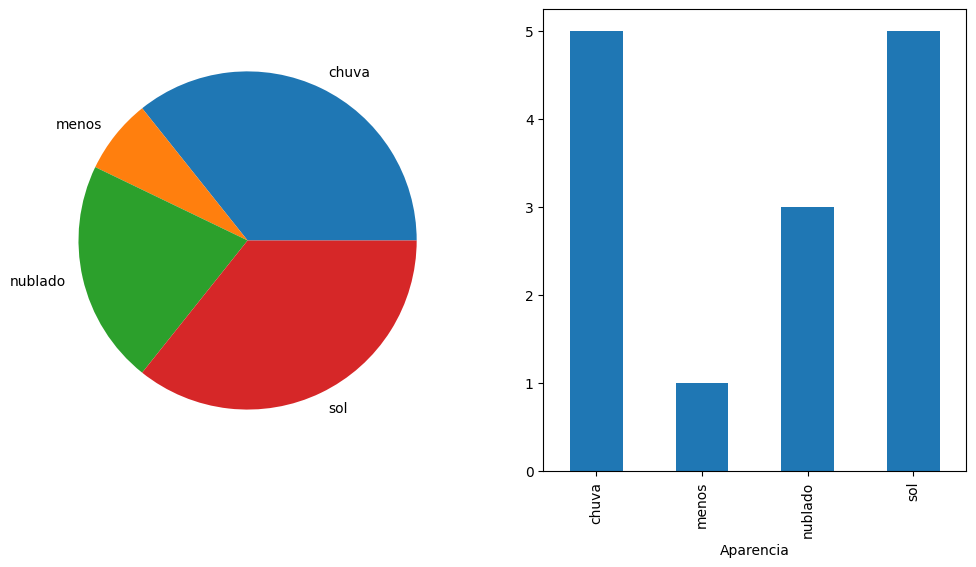

In [32]:
# Fazer a análise exploratória dos dados 
# Aparencia
agrupado = dataset.groupby('Aparencia').size()
display(agrupado)


fig, ax = plt.subplots(1,2, figsize=(12,6))
agrupado.plot.pie(ax=ax[0])
agrupado.plot.bar(ax=ax[1])

dataset.loc[:,'Aparencia'].isnull().sum()

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

<Axes: xlabel='Aparencia'>

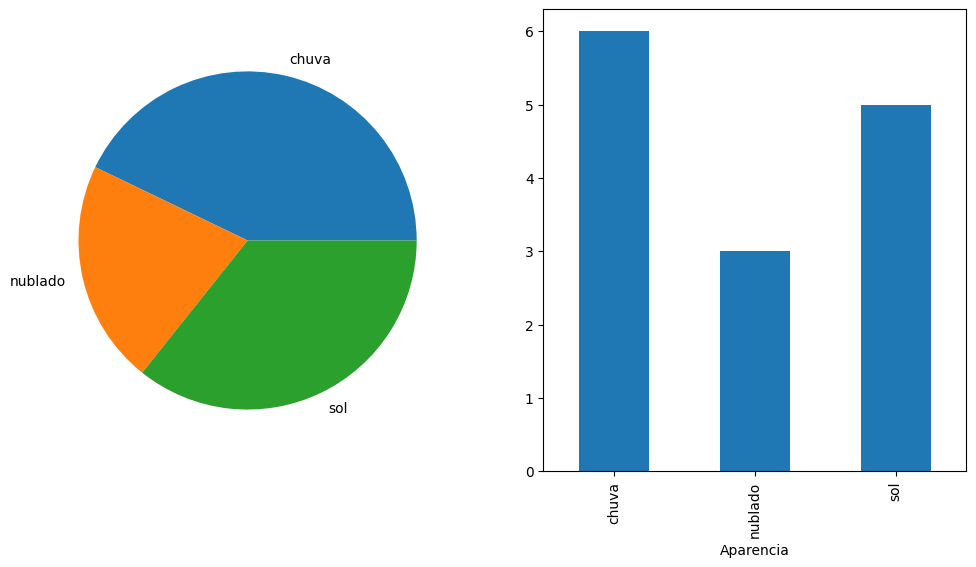

In [33]:
# Tratamento: Substituir pela moda
dataset.loc[dataset.loc[:,'Aparencia']=='menos','Aparencia'] = 'chuva'
agrupado = dataset.groupby('Aparencia').size()
display(agrupado)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))
agrupado.plot.pie(ax=ax1)
agrupado.plot.bar(ax=ax2)

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

1

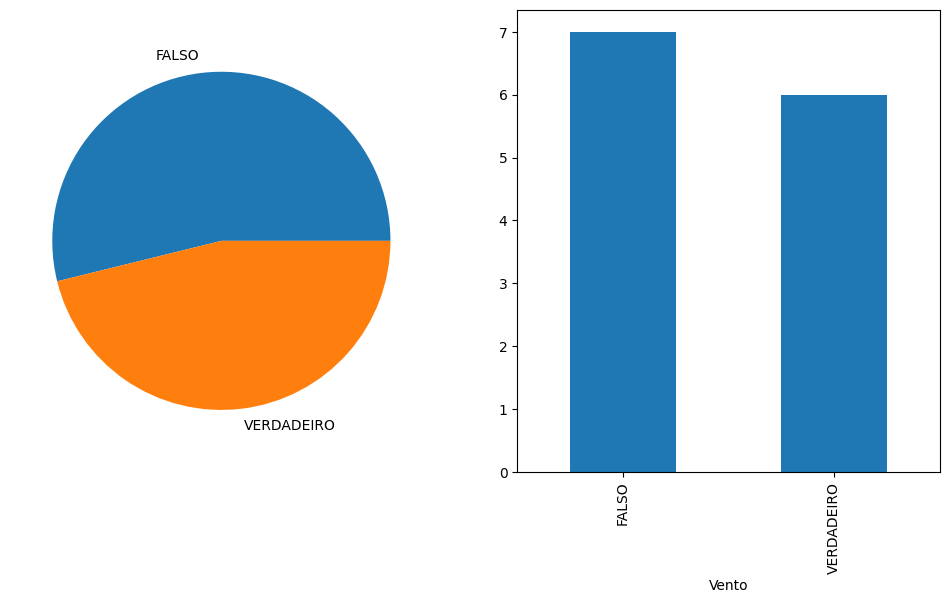

In [34]:
agrupado = dataset.groupby('Vento').size()
fig, ax = plt.subplots(1,2, figsize=(12,6))
agrupado.plot.pie(ax=ax[0])
agrupado.plot.bar(ax=ax[1])
display(agrupado)
dataset.loc[:,'Vento'].isnull().sum()


Vento
FALSO         8
VERDADEIRO    6
dtype: int64

0

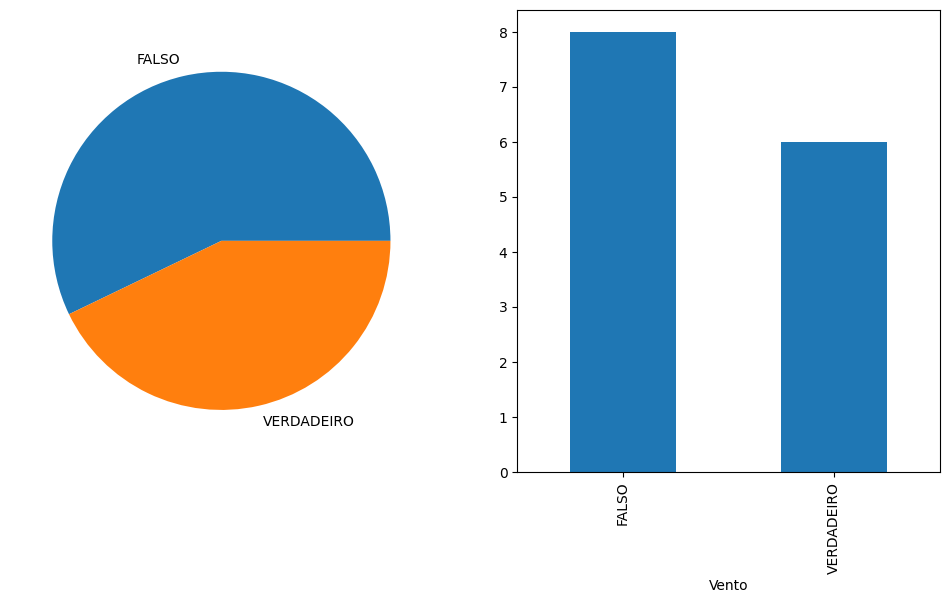

In [35]:
dataset.loc[dataset.loc[:,'Vento'].isnull(),'Vento'] = 'FALSO'
agrupado = dataset.groupby('Vento').size()
fig, ax = plt.subplots(1,2, figsize=(12,6))
agrupado.plot.pie(ax=ax[0])
agrupado.plot.bar(ax=ax[1])
display(agrupado)
dataset.loc[:,'Vento'].isnull().sum()

Jogar
nao    5
sim    9
dtype: int64

0

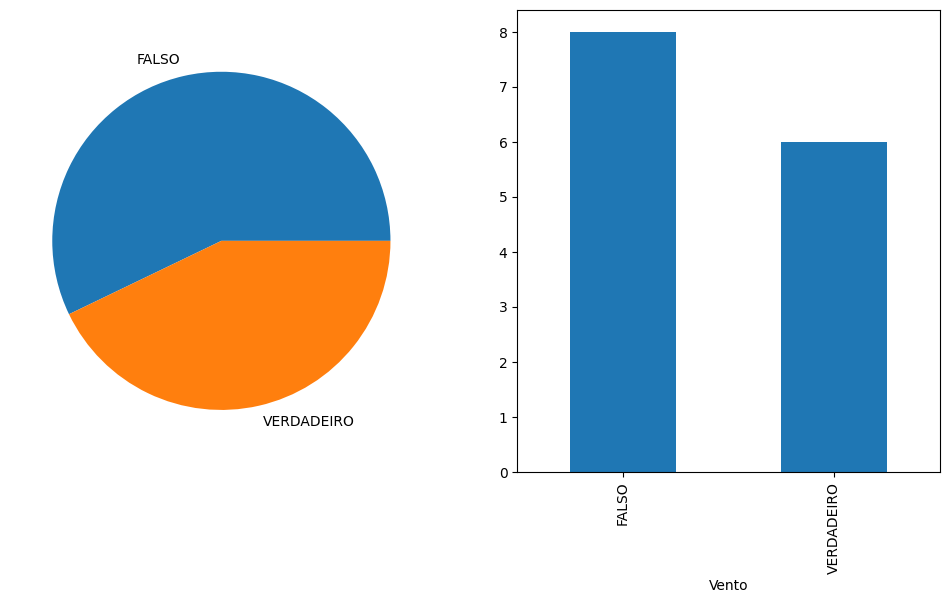

In [36]:
agrupar = dataset.groupby('Jogar').size()
display(agrupar)
fig, ax = plt.subplots(1,2,figsize=(12,6))
agrupado.plot.pie(ax=ax[0])
agrupado.plot.bar(ax=ax[1])
dataset.loc[:,'Jogar'].isnull().sum()

# Análise exploratória dos dados Numéricos<br>

- Fazer uma visualização estatística coluna para observar o comportamento dos dados.<br>
- Fazer um gráfico de histograma mais um de boxplot para ter noção da distribuição.<br>
- Verificar se há valores nulos
- verificar se há valores duplicados
- verificar se há valores não válidos

# Tratamento dos dados<br>

- Fazer a substituição dos não válidas pela mediana
- Fazer a substituição dos valores NA pela mediana
- Fazer a remoção dos valores duplicados
- Fazer a substituição dos valores maiores que 2*std pela mediana (na curva normal 2std é ~95% dos casos)
- Fazer a análise exploratória para verificar as mudanças

Estatística Descritiva


count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

Valores nulos


0

Valores duplicados


,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75,200.0,FALSO,sim
10,sol,75,70.0,VERDADEIRO,sim


Valores não válidos


,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


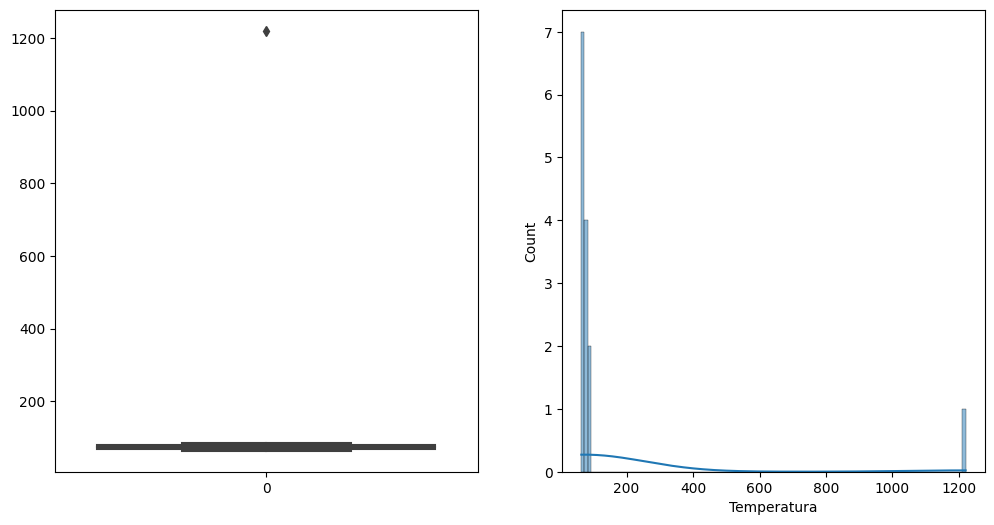

In [41]:
print('Estatística Descritiva')
display(dataset.loc[:,'Temperatura'].describe())
fig, ax = plt.subplots(1,2,figsize=(12,6))
srn.boxplot(dataset.loc[:,'Temperatura'],ax=ax[0])
srn.histplot(dataset.loc[:,'Temperatura'], kde=True, ax=ax[1])
print('Valores nulos')
display(dataset.loc[:,'Temperatura'].isnull().sum())
print('Valores duplicados')
display(dataset.loc[dataset.duplicated(['Temperatura'], keep=False)])
print('Valores não válidos')
display(dataset.loc[(dataset.loc[:,'Temperatura']< -130) | (dataset.loc[:,'Temperatura']>130)])

Estatística Descritiva


count    14.000000
mean     73.678571
std       6.556286
min      64.000000
25%      69.250000
50%      72.750000
75%      78.750000
max      85.000000
Name: Temperatura, dtype: float64

Series([], Name: Temperatura, dtype: float64)

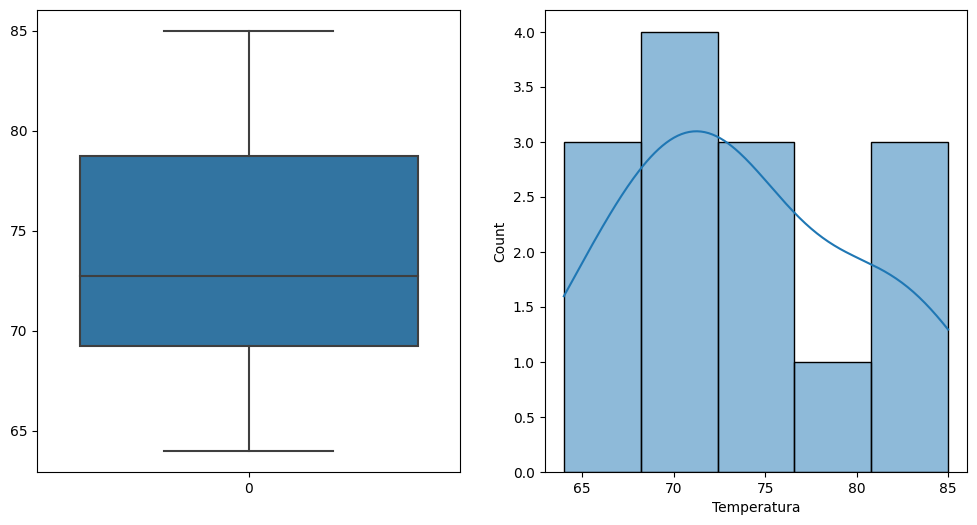

In [43]:
mediana = sts.median(dataset.loc[:,'Temperatura'])
dataset.loc[(dataset.loc[:,'Temperatura']<-130)|(dataset.loc[:,'Temperatura']>130),'Temperatura'] = mediana

print('Estatística Descritiva')
display(dataset.loc[:,'Temperatura'].describe())
fig,ax = plt.subplots(1,2,figsize=(12,6))
srn.boxplot(dataset.loc[:,'Temperatura'], ax=ax[0])
srn.histplot(dataset.loc[:,'Temperatura'], kde=True, ax=ax[1])
display(dataset.loc[(dataset.loc[:,'Temperatura'] < -130)|(dataset.loc[:,'Temperatura']>130),'Temperatura'])

Estatística Descritiva


count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

Valores NA


1

Valores duplicados


,Aparencia,Temperatura,Umidade,Vento,Jogar
1,sol,80.0,90.0,VERDADEIRO,nao
5,chuva,65.0,70.0,VERDADEIRO,nao
8,sol,69.0,70.0,FALSO,sim
10,sol,75.0,70.0,VERDADEIRO,sim
11,nublado,72.0,90.0,VERDADEIRO,sim


Valores Inválidos


9    200.0
Name: Umidade, dtype: float64

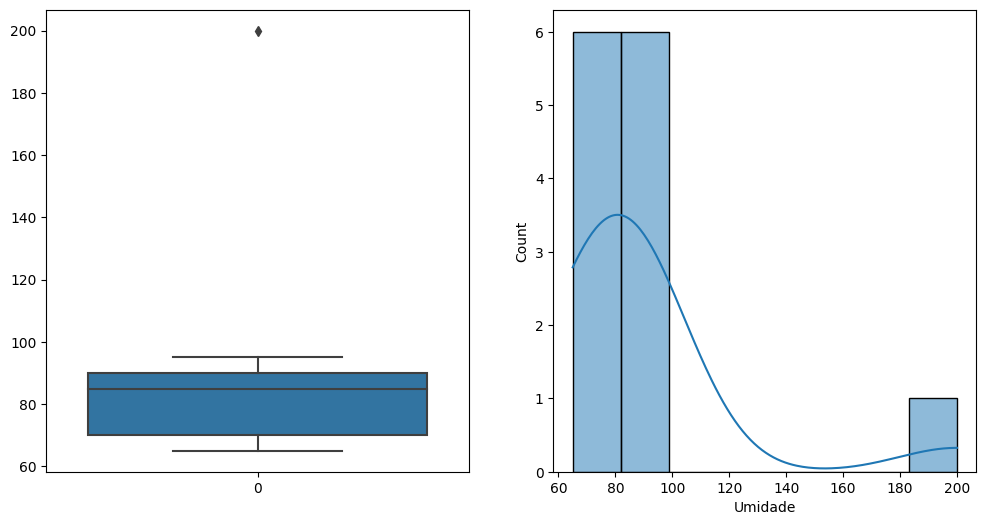

In [51]:
print('Estatística Descritiva')
display(dataset.loc[:,'Umidade'].describe())
fig, ax = plt.subplots(1,2,figsize=(12,6))
srn.boxplot(dataset.loc[:,'Umidade'], ax=ax[0])
srn.histplot(dataset.loc[:,'Umidade'],kde=True, ax=ax[1])
print('Valores NA')
display(dataset.loc[:,'Umidade'].isnull().sum())
print('Valores duplicados')
display(dataset.loc[dataset.duplicated(['Umidade'], keep=False)])
print('Valores Inválidos')
display(dataset.loc[(dataset.loc[:,'Umidade']<0)|(dataset.loc[:,'Umidade']>100),'Umidade'])

Estatística Descritiva


count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

Dados NA


0

Dados Inválidos


Series([], Name: Umidade, dtype: float64)

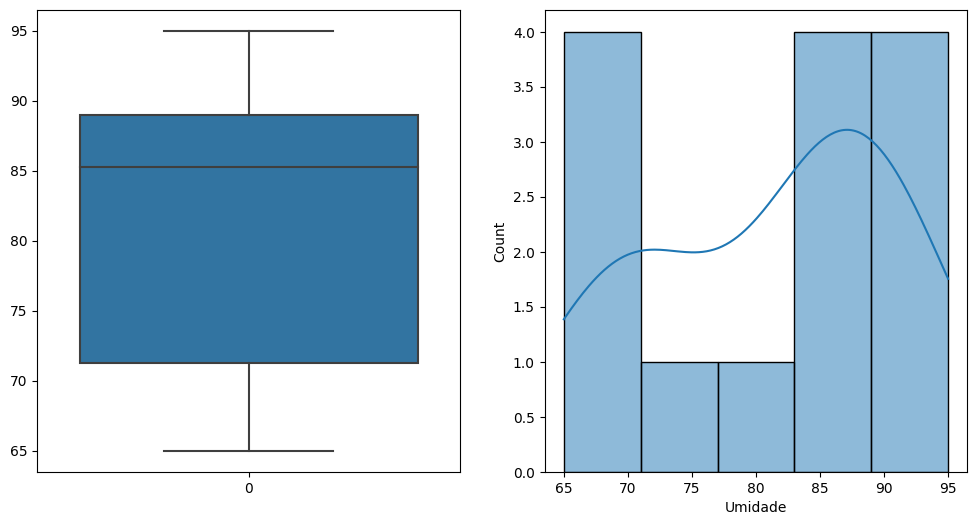

In [52]:
# Tratamento: Valor NA, Valores Inválidos
mediana = sts.median(dataset.loc[:,'Umidade'])
dataset.loc[:,'Umidade'].fillna(mediana, inplace=True)
dataset.loc[(dataset.loc[:,'Umidade']<0)|(dataset.loc[:,'Umidade']>100),'Umidade'] = mediana

print('Estatística Descritiva')
display(dataset.loc[:,'Umidade'].describe())
fig, ax = plt.subplots(1,2,figsize=(12,6))
srn.boxplot(dataset.loc[:,'Umidade'], ax=ax[0])
srn.histplot(dataset.loc[:,'Umidade'], kde=True, ax=ax[1])
print('Dados NA')
display(dataset.loc[:,'Umidade'].isnull().sum())
print('Dados Inválidos')
display(dataset.loc[(dataset.loc[:,'Umidade']<0)|(dataset.loc[:,'Umidade']>100),'Umidade'])

# Finaliza fazendo uma verificação geral dos dados

In [53]:
display(dataset.head())
display(dataset.shape)
display(dataset.isnull().sum())

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


(14, 5)

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64